# Exploratory Data Analysis

## import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import sys
sys.path.append("../src/eda/")
from data_reader import *

#display settings
pd.set_option('display.float_format', lambda x: f'{x:.0f}')
np.set_printoptions(suppress=True)

## read data

In [2]:
#new instance of DataReader
reader = DataReader()

df = reader.read()

## describe data

In [3]:
def describe_df(df: pd.DataFrame, name: str) -> None:
    print(f"\n--- {name.upper()} ---")
    display(df.info())
    display(df.describe())

    # Null values
    print("\n### Null value count and percentage\n")
    nulls = df.isnull().sum()
    null_percent = (nulls / len(df)) * 100
    null_df = pd.DataFrame({
        'null_count': nulls,
        'null_percent': null_percent.map("{:.2f}%".format)
    })
    display(null_df[null_df['null_count'] > 0].sort_values(by='null_count', ascending=False))

    # Duplicates
    print(f"\n### Duplicates : {df.duplicated(subset=['price', 'url']).sum()}\n")

    # Head
    display(df.head(3))

In [4]:
describe_df(df, 'main')


--- MAIN ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18707 entries, 0 to 18706
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source           18707 non-null  object 
 1   price            18707 non-null  object 
 2   price_per_meter  16556 non-null  float64
 3   area             18707 non-null  float64
 4   rooms            18707 non-null  object 
 5   floor            17999 non-null  object 
 6   market_type      18707 non-null  object 
 7   furnished        18707 non-null  object 
 8   description      18706 non-null  object 
 9   district         18581 non-null  object 
 10  date             18707 non-null  object 
 11  url              18707 non-null  object 
 12  title            18707 non-null  object 
 13  building_type    14079 non-null  object 
 14  year_built       16858 non-null  float64
 15  rent             11735 non-null  float64
 16  finish_status    16083 non-null  object 
 17

None

,price_per_meter,area,year_built,rent,ad_id
count,16556,18707,16858,11735,18707
mean,18516,59,2000,816,66394619
std,6503,33,95,10152,616664
min,714,3,1,0,33133193
25%,14579,40,1976,500,66325866
50%,17120,53,2014,700,66552868
75%,20698,67,2025,950,66668844
max,194737,1892,11969,1099000,66740274



### Null value count and percentage



,null_count,null_percent
rent,6972,37.27%
heating,5683,30.38%
external_id,5501,29.41%
building_type,4628,24.74%
finish_status,2624,14.03%
ownership,2478,13.25%
price_per_meter,2151,11.50%
year_built,1849,9.88%
floor,708,3.78%
district,126,0.67%



### Duplicates : 1867



,source,price,price_per_meter,area,rooms,floor,market_type,furnished,description,district,...,title,building_type,year_built,rent,finish_status,ownership,heating,elevator,ad_id,external_id
0,otodom,944000,19667,48,2,parter/4,wtórny,Nie,<p> Z przyjemnością przedstawiam Państwu ...,śródmieście,...,Okazja! Dwa duże pokoje w kamienicy w Centrum!,tenement,1957,700,ready_to_use,full_ownership,miejskie,Nie,66596733,NaN
1,otodom,Zapytaj o cenę,NaN,42,2,2/6,pierwotny,Nie,<ul><li>2-pokojowe mieszkanie<strong> numer B2...,ursynów,...,2-pokojowe mieszkanie 41m2 + balkon Bezpośrednio,NaN,2026,NaN,to_completion,full_ownership,NaN,Nie,66339990,44b648c4-a30c-4d20-8c5f-5b20da302d89
2,otodom,799000,12292,65,4,3/10,wtórny,Nie,"Mam przyjemność zaprezentować Państwu, mieszka...",praga-północ,...,Metro Wileńska 200 m/blok po remocie/loggia/patio,block,1978,520,to_renovation,limited_ownership,miejskie,Nie,65526970,1636af50-af72-4d85-9b6d-0dceaf3a20aa


**Observation:** The dataset contains 18,707 rows, 22 columns and 1867 duplicates. Most features are stored as strings. Several columns have over 20% missing values, including rent, heating, external_id, and building_type.

**Interpretation:** The dataset is sufficiently large for model training. However, it requires data type conversions and handling of missing values before it can be used effectively.

**Impact:** Proper preprocessing (e.g. casting types, imputing or dropping nulls) is essential to avoid model bias or failure due to inconsistent or incomplete data.

## clear and transform data

In [5]:
def show_unique_value(column_name: str) -> None:
    print(f"=== Unique value {column_name} ===")
    print(df[column_name].unique())

Price column

In [6]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

PPM

In [7]:
#null values inputations
df.loc[:,'price_per_meter'] = df['price_per_meter'].fillna(df['price'] / df['area'])

Rooms

In [8]:
show_unique_value('rooms')

=== Unique value rooms ===
['2' '4' '5' '3' '1' '6' '7' '9' '8' 'more' 2 4 5 3 1 6 7 8 10]


In [9]:
df.loc[:, 'rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
df = df.dropna(subset=['rooms'])

Floor

In [10]:
show_unique_value('floor')

=== Unique value floor ===
['parter/4' '3/10' '5/8' '1/2' '5/6' 'parter/15' 'parter/2' '3/3' '4/11'
 '10/10' '4/7' 'parter/1' '3' '2/10' '2/6' '3/4' '2/3' '7/7' '3/7' '3/5'
 '2/4' '2/2' 'parter/8' '3/6' '1/4' '10/13' 'parter/5' '10/52' 'parter'
 '> 10/52' '1/5' '> 10/42' '5/5' '4/5' '2/8' '5/7' '> 10' nan '6/11' '4/4'
 '4/8' '2/5' '6/6' '7/8' '1/6' '> 10/15' '5/13' '6/12' 'parter/3' '8/10'
 '6/7' '5/11' '1/8' 'parter/7' '3/12' '1/3' '1/7' '1' '1/1' '> 10/25'
 '3/11' 'suterena/3' '2/7' '1/10' 'parter/10' '8/8' '3/15' '7/9' '6/9'
 '4/10' '4/16' '6/17' '2' '10' '4/15' 'parter/9' '4/6' '10/12' '6/8'
 '10/17' '6/10' 'parter/11' '5/10' '8' '7/10' '4' '1/13' '8/17' 'parter/6'
 '2/12' '1/17' '> 10/17' '9/10' '9/9' '4/12' '1/11' '7/11' '2/15' '5/14'
 '> 10/30' '3/8' '8/11' '2/9' '6/18' '> 10/16' '3/16' '5/15' '7/3'
 '> 10/14' '> 10/13' '7/15' '5' '> 10/44' '2/16' '9/12' '6/15' '9/15'
 '> 10/27' '8/9' '> 10/12' '10/11' '2/11' '9/13' 'parter/12' '1/9' '7/18'
 '8/12' '7/14' '3/9' '5/9' '10/14' '> 

In [11]:
def prepare_floor_features(df: pd.DataFrame) -> pd.DataFrame:
    #split floor column by sep "/"
    df[['floor', 'building_max_floor']]  = df['floor'].str.split('/', expand=True)
    
    floor_map = {
    'suterena': -1,
    'parter': 0,
    }

    df['floor'] = df['floor'].replace(floor_map)

    df['building_max_floor'] = pd.to_numeric(df['building_max_floor'], errors='coerce')
    df.loc[df['floor'] == 'poddasze', 'floor'] = df['building_max_floor'] + 1
        
    df['is_above_10_floor'] = df['floor'].astype(str).str.contains('>').astype(int)

    df.loc[:,'floor'] = df['floor'].astype(str).str.replace('>', '', regex=False)

    df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
    
    df = df.dropna(subset=['floor', 'building_max_floor'])

    return df

In [12]:
df = prepare_floor_features(df)

In [13]:
show_unique_value('floor')
show_unique_value('building_max_floor')

=== Unique value floor ===
[ 0.  3.  5.  1.  4. 10.  2.  7.  6.  8. -1.  9. 11.]
=== Unique value building_max_floor ===
[     4.     10.      8.      2.      6.     15.      3.     11.      7.
      1.      5.     13.     52.     42.     12.     25.      9.     16.
     17.     14.     30.     18.     44.     27.     24.     22.     29.
    255.     20.     19.     23.     54.     28.     26. 102014.]


In [14]:
df.head(3)

,source,price,price_per_meter,area,rooms,floor,market_type,furnished,description,district,...,year_built,rent,finish_status,ownership,heating,elevator,ad_id,external_id,building_max_floor,is_above_10_floor
0,otodom,944000,19667,48,2,0,wtórny,Nie,<p> Z przyjemnością przedstawiam Państwu ...,śródmieście,...,1957,700,ready_to_use,full_ownership,miejskie,Nie,66596733,NaN,4,0
2,otodom,799000,12292,65,4,3,wtórny,Nie,"Mam przyjemność zaprezentować Państwu, mieszka...",praga-północ,...,1978,520,to_renovation,limited_ownership,miejskie,Nie,65526970,1636af50-af72-4d85-9b6d-0dceaf3a20aa,10,0
3,otodom,1993000,42513,47,2,5,pierwotny,Nie,<ul><li>2-pokojowe mieszkanie<strong> numer A....,wola,...,2026,NaN,to_completion,full_ownership,NaN,Nie,66349142,023a6207-7138-414b-8f94-fa38ea77c0fe,8,0


Market type

In [15]:
show_unique_value('market_type')

=== Unique value market_type ===
['wtórny' 'pierwotny']


Furnished

In [16]:
show_unique_value('furnished')

=== Unique value furnished ===
['Nie']


District

In [17]:
show_unique_value('district')

=== Unique value district ===
['śródmieście' 'praga-północ' 'wola' 'ursynów' 'praga-południe' 'wawer'
 'włochy' 'białołęka' 'żoliborz' 'targówek' 'mokotów' 'wilanów' 'ursus'
 'bielany' 'ochota' 'bemowo' nan 'wesoła' 'rembertów']


In [18]:
df = df.dropna(subset=['district'])

Building type

In [19]:
show_unique_value('building_type')

=== Unique value building_type ===
['tenement' 'block' nan 'apartment' 'infill' 'ribbon' 'house' 'loft']


In [20]:
df.loc[:,'building_type'] = df['building_type'].fillna('unknown')

Year Built

In [21]:
show_unique_value('year_built')

=== Unique value year_built ===
[ 1957.  1978.  2026.  2016.  1981.  1938.  2009.  2025.  2003.  1990.
  1956.  1972.    nan  1930.  1948.  1954.  1955.  1968.  2019.  2007.
  2000.  2006.  1900.  1960.  2023.  2015.  1899.  2013.  1906.  2018.
  1890.  2001.  2014.  2002.  2004.  1969.  2017.  1963.  2020.  2005.
  2010.  1882.  1950.  1964.  1935.  2012.  1959.  1986.  1932.  2024.
  1975.  1965.  2027.  1951.  1971.  1976.  1987.  1961.  1997.  1979.
  1912.  2008.  2021.  2022.  1973.  1958.  1988.  1977.  1989.  1970.
  1999.  1980.  1962.  2011.  1885.  1936.  1916.  1995.  1974.  1991.
  1996.  1966.  1953.  1993.  1949.  1967.  1982.  1911.  1939.  1927.
  1983.  1913.  1931.  1994.  1998.  1945.  1921.  1933.  1984.  1917.
  1914.  1985.  1830.  1937.  1928.  1907.  1992.  1952.  1947.  1908.
  1026.  1910.     1.  1929.  1903.  1672.  1920.  1896.  1905.  1926.
  1848.  1898.  1904.    10.  1925.  1934.  1880.  1946.  1895.  1919.
    19.  1897.  1072.  1909.  1923.    18.  1

In [22]:
df.loc[df['year_built'] < 1300, 'year_built'] = np.nan
df.loc[:,'year_built'] = df['year_built'].fillna(df['year_built'].median())

Rent

In [23]:
df.loc[:,'rent'] = df['rent'].fillna(df['rent'].median())

Finish status

In [24]:
show_unique_value('finish_status')

=== Unique value finish_status ===
['ready_to_use' 'to_renovation' 'to_completion' nan]


In [25]:
df = df.dropna(subset=['finish_status'])

Ownership

In [26]:
show_unique_value('ownership')

=== Unique value ownership ===
['full_ownership' 'limited_ownership' nan 'share' 'usufruct']


In [27]:
df = df.dropna(subset=['ownership'])

Heating

In [28]:
show_unique_value('heating')

=== Unique value heating ===
['miejskie' nan 'gazowe' 'inne' 'kotłownia' 'elektryczne' 'piece kaflowe']


In [29]:
df.loc[:,'heating'] = df['heating'].fillna('unknown')

Elevator

In [30]:
show_unique_value('elevator')

=== Unique value elevator ===
['Nie']


IDs

In [31]:
df = df.drop(['ad_id', 'external_id'], axis=1)

In [32]:
df.head(3)

,source,price,price_per_meter,area,rooms,floor,market_type,furnished,description,district,...,title,building_type,year_built,rent,finish_status,ownership,heating,elevator,building_max_floor,is_above_10_floor
0,otodom,944000,19667,48,2,0,wtórny,Nie,<p> Z przyjemnością przedstawiam Państwu ...,śródmieście,...,Okazja! Dwa duże pokoje w kamienicy w Centrum!,tenement,1957,700,ready_to_use,full_ownership,miejskie,Nie,4,0
2,otodom,799000,12292,65,4,3,wtórny,Nie,"Mam przyjemność zaprezentować Państwu, mieszka...",praga-północ,...,Metro Wileńska 200 m/blok po remocie/loggia/patio,block,1978,520,to_renovation,limited_ownership,miejskie,Nie,10,0
3,otodom,1993000,42513,47,2,5,pierwotny,Nie,<ul><li>2-pokojowe mieszkanie<strong> numer A....,wola,...,2-pokojowe mieszkanie 46m2 + loggia Bez Prowizji,unknown,2026,715,to_completion,full_ownership,unknown,Nie,8,0


In [33]:
describe_df(df, 'main')


--- MAIN ---
<class 'pandas.core.frame.DataFrame'>
Index: 11666 entries, 0 to 18706
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              11666 non-null  object 
 1   price               11666 non-null  float64
 2   price_per_meter     11666 non-null  float64
 3   area                11666 non-null  float64
 4   rooms               11666 non-null  object 
 5   floor               11666 non-null  float64
 6   market_type         11666 non-null  object 
 7   furnished           11666 non-null  object 
 8   description         11665 non-null  object 
 9   district            11666 non-null  object 
 10  date                11666 non-null  object 
 11  url                 11666 non-null  object 
 12  title               11666 non-null  object 
 13  building_type       11666 non-null  object 
 14  year_built          11666 non-null  float64
 15  rent                11666 non-null  float64


None

,price,price_per_meter,area,floor,year_built,rent,building_max_floor,is_above_10_floor
count,11666,11666,11666,11666,11666,11666,11666,11666
mean,1128858,18743,59,3,1998,756,15,0
std,929608,6383,29,3,97,445,944,0
min,180000,5104,14,-1,1672,0,1,0
25%,690000,14894,40,1,1974,600,3,0
50%,880000,17456,53,2,2008,715,5,0
75%,1249000,20952,67,4,2022,870,8,0
max,25000000,194737,476,10,11969,12000,102014,1



### Null value count and percentage



,null_count,null_percent
description,1,0.01%



### Duplicates : 1208



,source,price,price_per_meter,area,rooms,floor,market_type,furnished,description,district,...,title,building_type,year_built,rent,finish_status,ownership,heating,elevator,building_max_floor,is_above_10_floor
0,otodom,944000,19667,48,2,0,wtórny,Nie,<p> Z przyjemnością przedstawiam Państwu ...,śródmieście,...,Okazja! Dwa duże pokoje w kamienicy w Centrum!,tenement,1957,700,ready_to_use,full_ownership,miejskie,Nie,4,0
2,otodom,799000,12292,65,4,3,wtórny,Nie,"Mam przyjemność zaprezentować Państwu, mieszka...",praga-północ,...,Metro Wileńska 200 m/blok po remocie/loggia/patio,block,1978,520,to_renovation,limited_ownership,miejskie,Nie,10,0
3,otodom,1993000,42513,47,2,5,pierwotny,Nie,<ul><li>2-pokojowe mieszkanie<strong> numer A....,wola,...,2-pokojowe mieszkanie 46m2 + loggia Bez Prowizji,unknown,2026,715,to_completion,full_ownership,unknown,Nie,8,0


**Observation:** Data types were adjusted (e.g., converting object to string). Some columns, like floor, were cleaned and transformed through feature extraction. After experimental preprocessing and removing rows with missing values, the dataset now contains approximately 11,000 rows.

**Interpretation:** This process improved my understanding of data quality and noise, which will support the design of a robust preprocessing pipeline and effective feature engineering strategies in the next steps.

## boxplots for outliers

In [34]:
def boxplots(df: pd.DataFrame, column_name: str) -> None:
    #price
    sns.set(rc={'figure.figsize':(11,8)})
    
    sns.boxplot(x='district', hue='district', y=column_name, data = df, palette='Set3')
    sns.stripplot(x='district', y=column_name, data=df,
                  jitter=True,
                  marker='o',
                  alpha=0.8,
                  color='black')
    plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.xticks(rotation=45)
    plt.title(column_name)
    plt.tight_layout()
    plt.show()

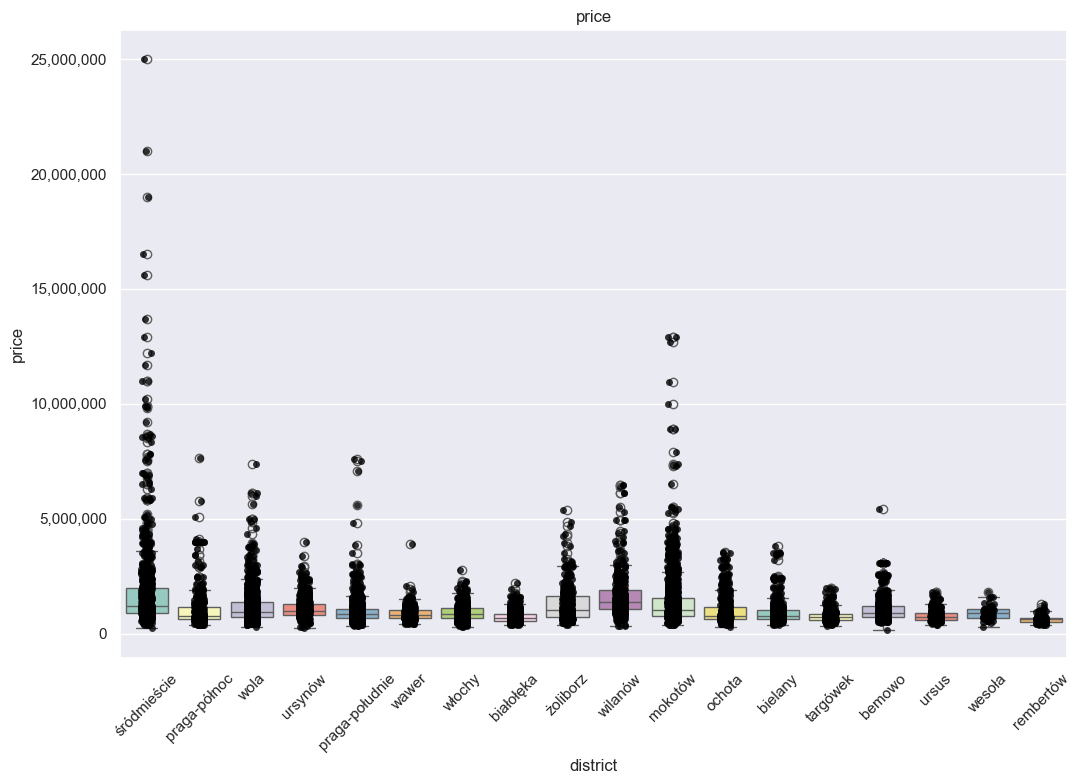

In [35]:
boxplots(df, 'price')

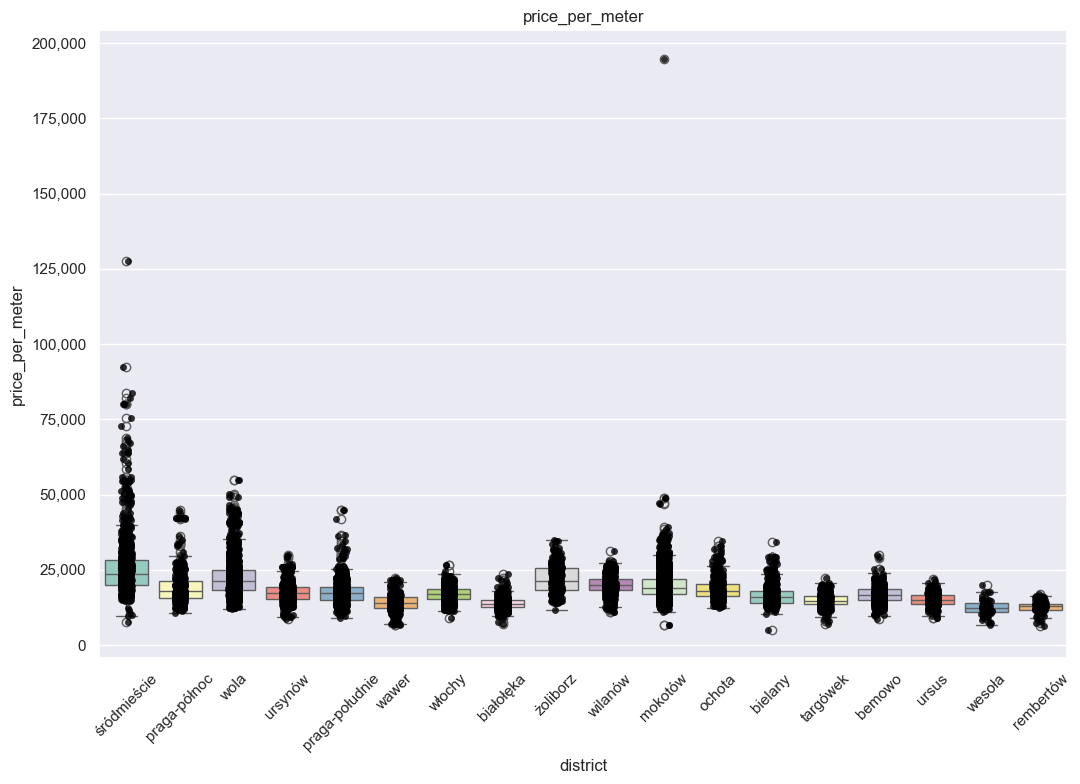

In [36]:
boxplots(df, 'price_per_meter')

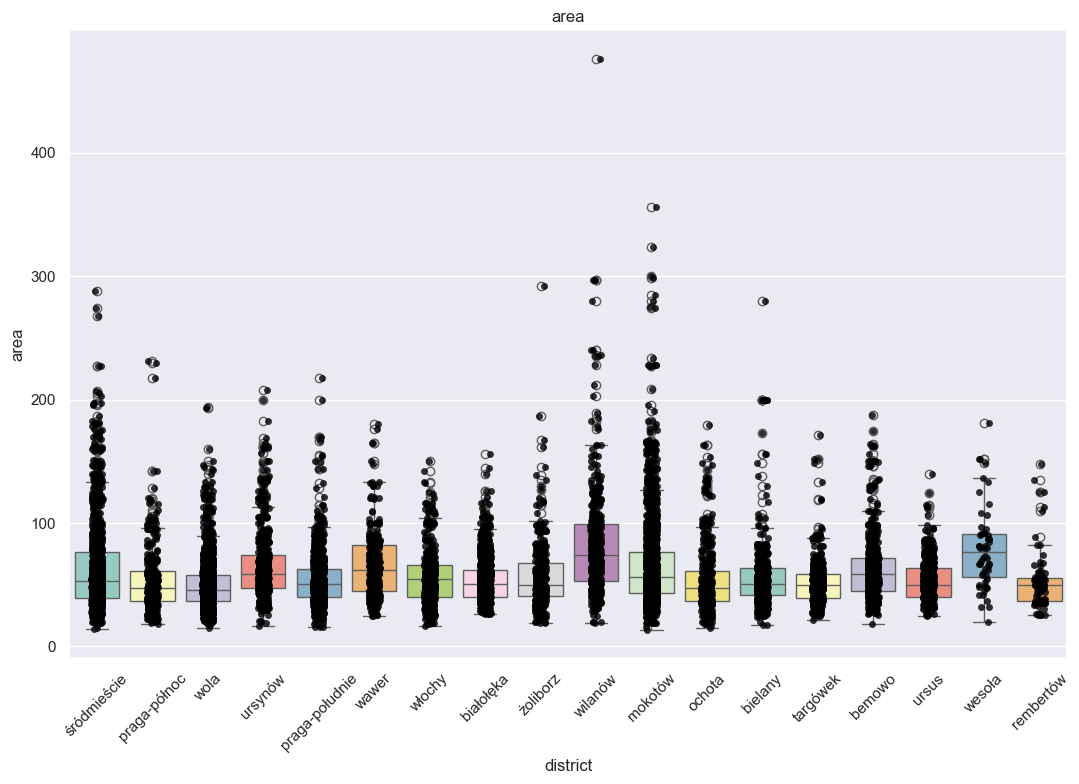

In [37]:
boxplots(df, 'area')

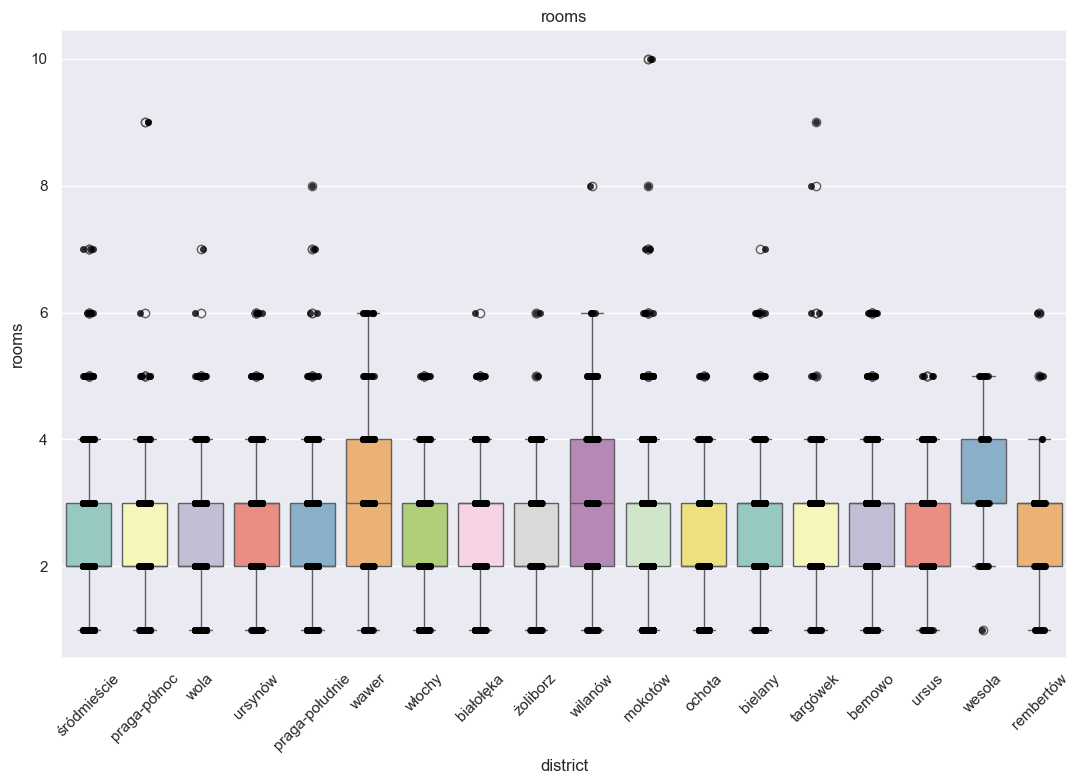

In [38]:
boxplots(df, 'rooms')

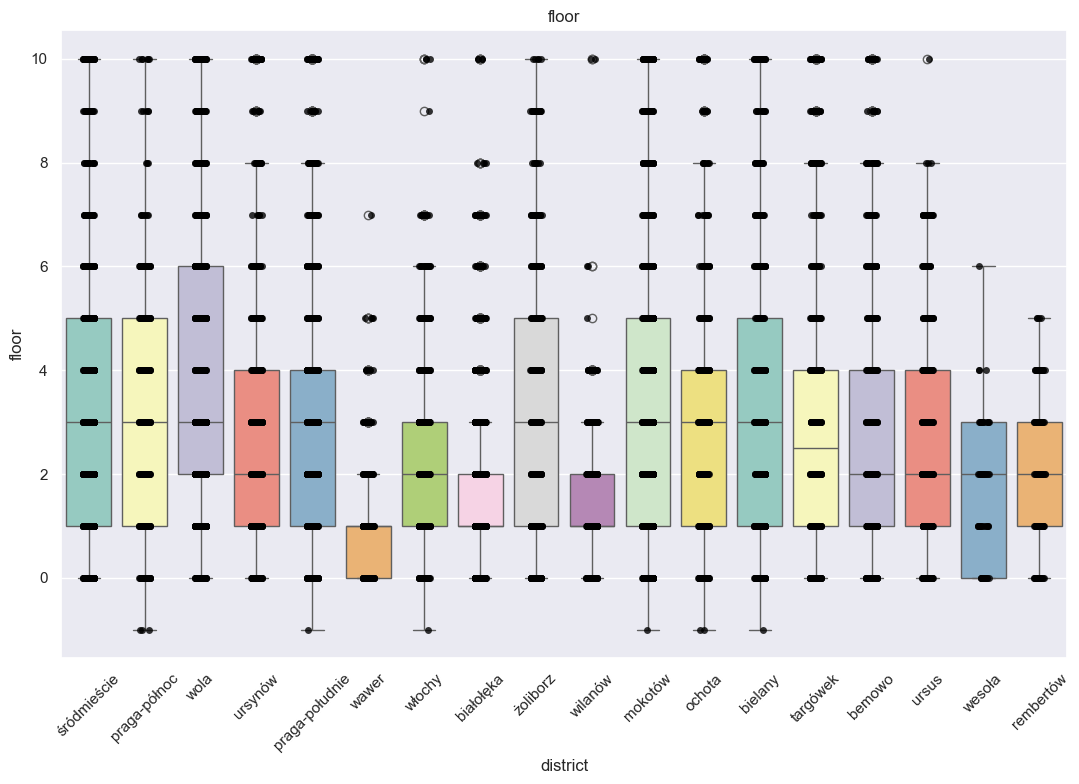

In [39]:
boxplots(df, 'floor')

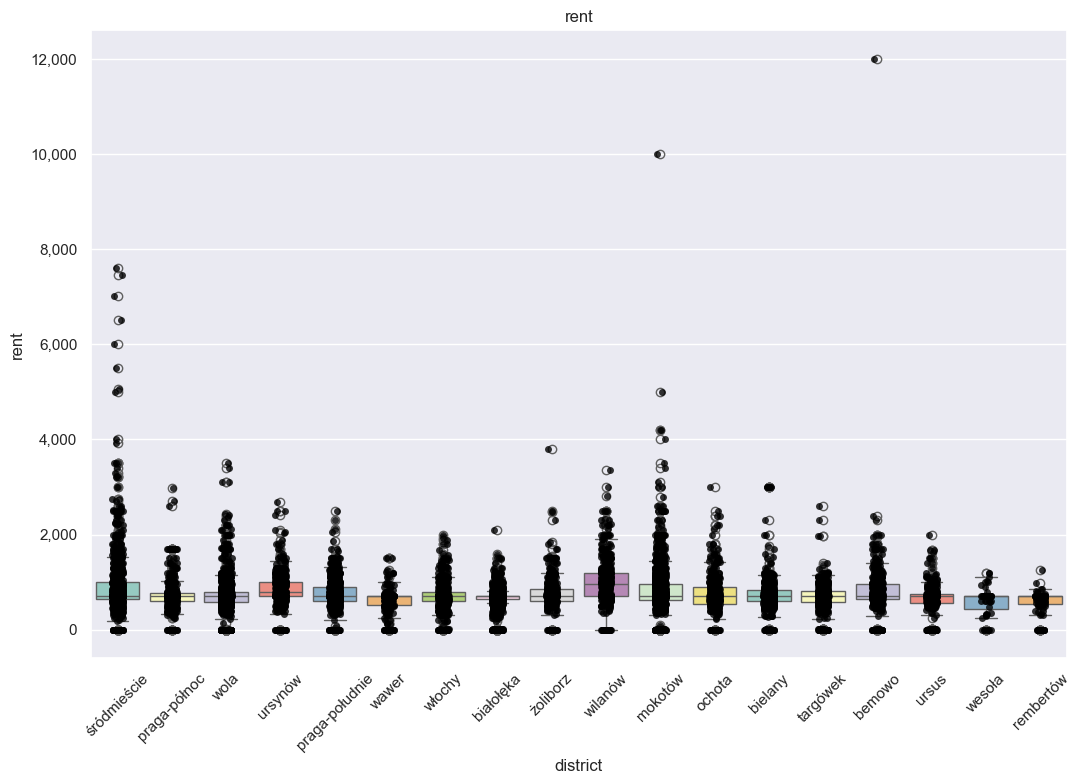

In [40]:
boxplots(df, 'rent')

**Observation:** Numerical columns, especially price and price_per_meter, contain significant outliers that may distort analysis and model performance.

**Interpretation:** Identifying these extreme values enhances my understanding of the data distribution and will support the development of appropriate outlier handling strategies during preprocessing.

## correlation matrix

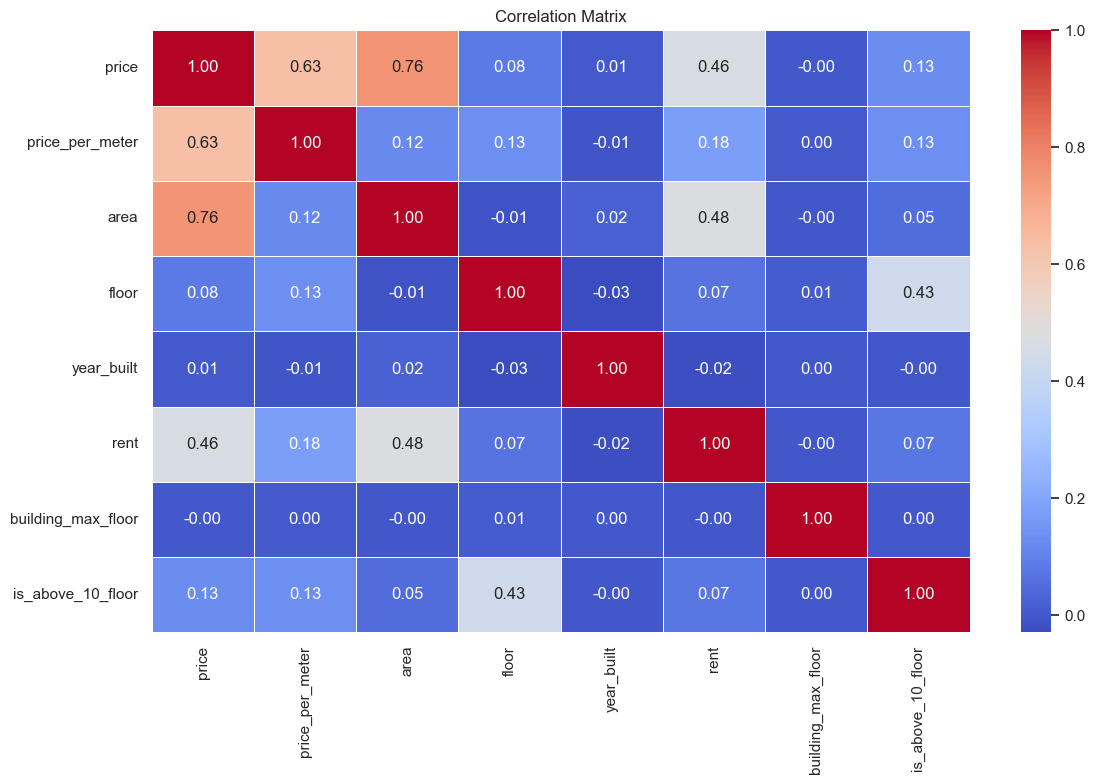

In [41]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

**Observation:** price_per_meter and area show the highest positive correlation with price (0.63 and 0.76, respectively). Additionally, rent is moderately correlated with both price (0.46) and area (0.48). There are no strong negative correlations among the numerical features.

**Interpretation:** These relationships suggest that area, price_per_meter, and rent are valuable predictors for modeling price. Understanding their correlations will help in feature selection and guide preprocessing decisions (e.g., avoiding multicollinearity or redundant variables).

## numerical data distribution

In [42]:
def numeric_distribution(df: pd.DataFrame, column: str, bins: int = 30, clip_percentile: float = 0.90) -> None:
    plt.figure(figsize=(8, 5))
    
    upper_limit = df[column].quantile(clip_percentile)
    clipped_data = df[df[column] <= upper_limit][column]
    
    sns.histplot(clipped_data.dropna(), bins=bins, kde=False, color="skyblue")
    plt.title(f"Histogram: {column} (≤ {clip_percentile*100:.0f} clip_percentile)")
    plt.xlabel(column)
    plt.ylabel("count")

    plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    plt.tight_layout()
    plt.show()

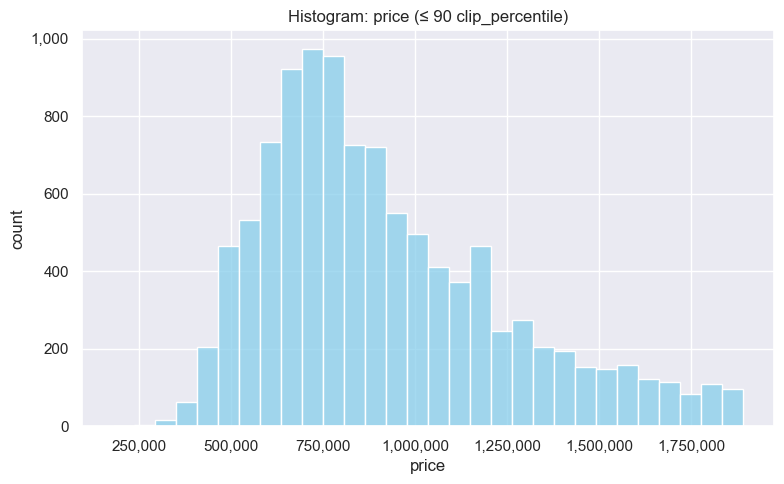

In [43]:
numeric_distribution(df, 'price')

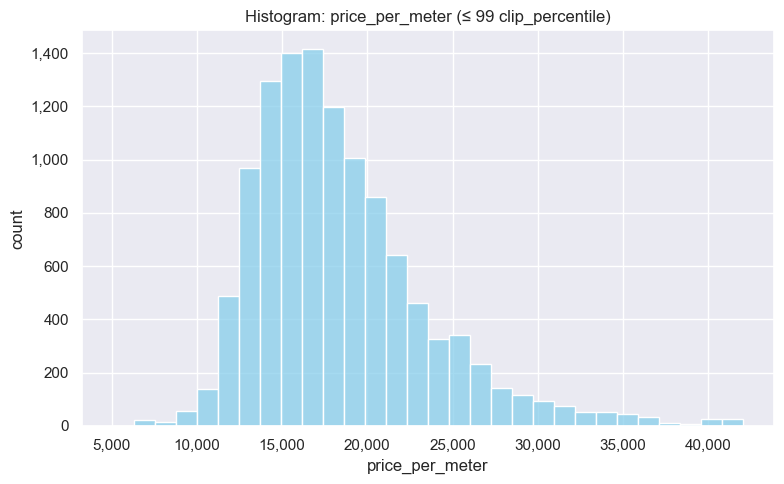

In [44]:
numeric_distribution(df, 'price_per_meter', 30, 0.99)

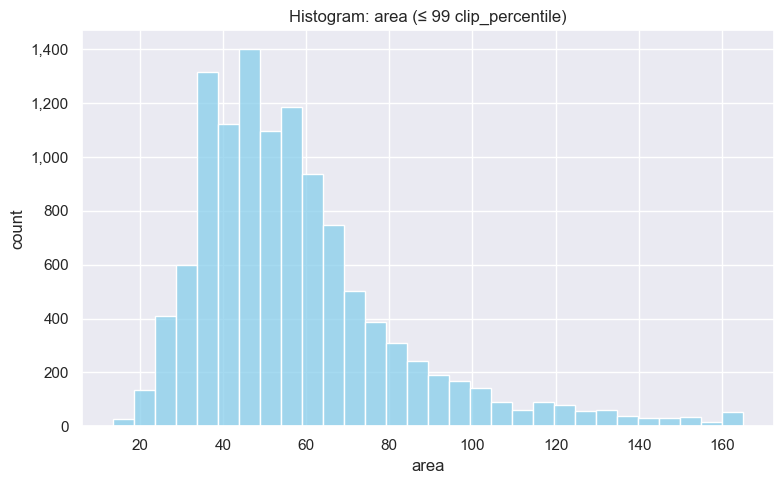

In [45]:
numeric_distribution(df, 'area', 30, 0.99)

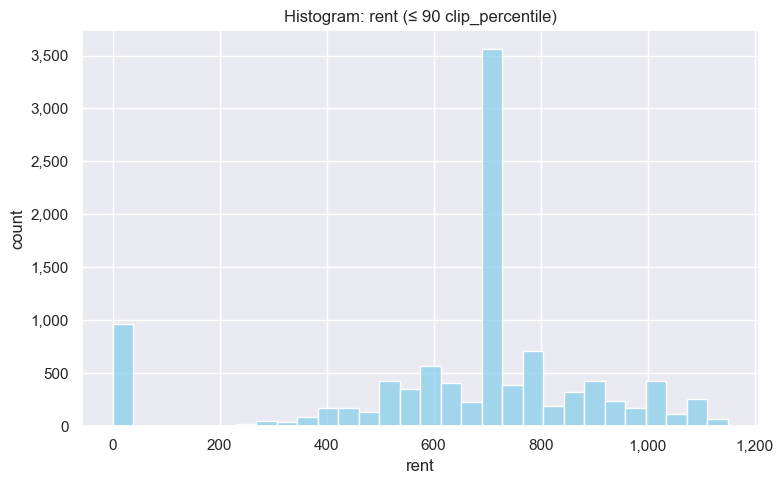

In [46]:
numeric_distribution(df, 'rent', 30, 0.90)

**Observation:** The numerical features price, price_per_meter, and area show right-skewed distributions, with the majority of values in the lower range and a long tail extending toward outliers.
The rent feature displays a distinct spike at ~700 PLN, likely caused by an imputed or default value, rather than actual variation in rent prices.

**Interpretation:** To better visualize the data and reduce the impact of extreme values, a custom function with a clip_percentile parameter was applied to trim the upper tail of each distribution.
This approach revealed the true shape of the distributions and exposed patterns like potential data imputations.

## categorical data distribution

In [47]:
def categorical_distr(df: pd.DataFrame, column_name: str) -> None:
    plt.figure(figsize=(8, 4)) 
    ax = sns.countplot(data=df, x=column_name, hue=column_name, palette="pastel", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution {column_name}")
    
    for container in ax.containers:
        ax.bar_label(container)

    plt.tight_layout()
    plt.show()

2025-04-20 15:40:55,089 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-20 15:40:55,099 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


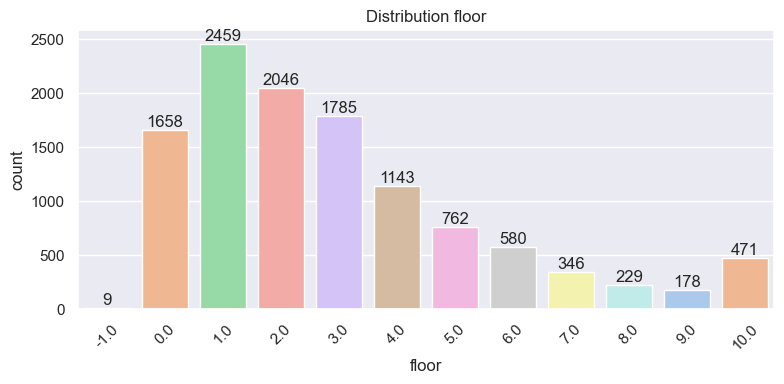

In [48]:
categorical_distr(df, "floor")

2025-04-20 15:40:55,299 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-20 15:40:55,311 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


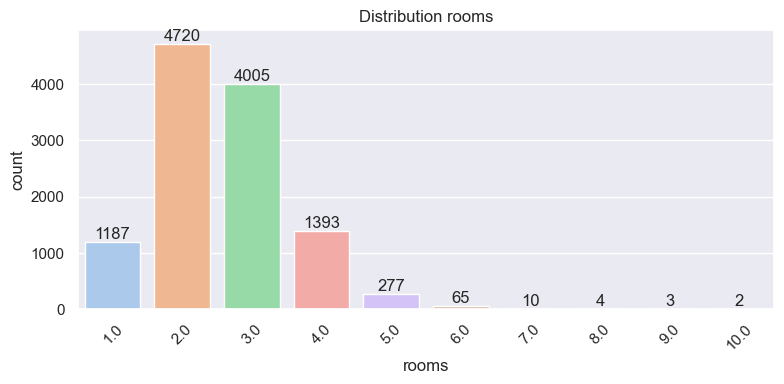

In [49]:
categorical_distr(df, "rooms")

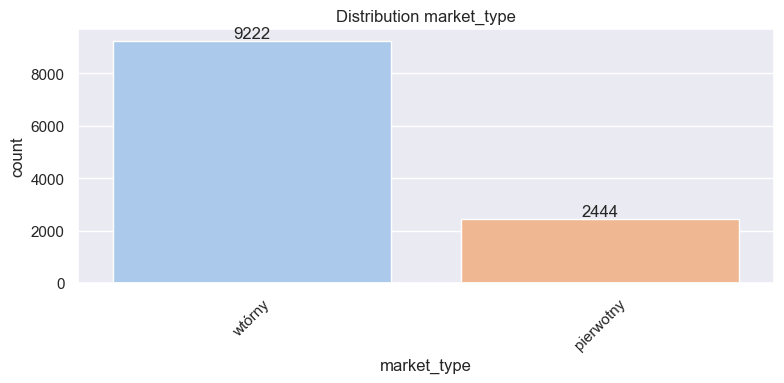

In [50]:
categorical_distr(df, "market_type")

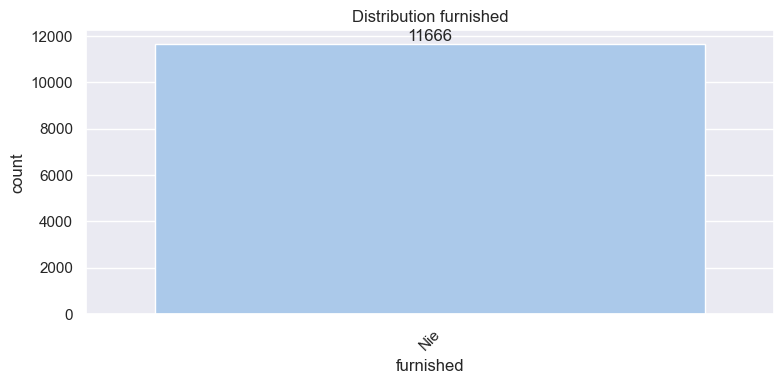

In [51]:
categorical_distr(df, "furnished")

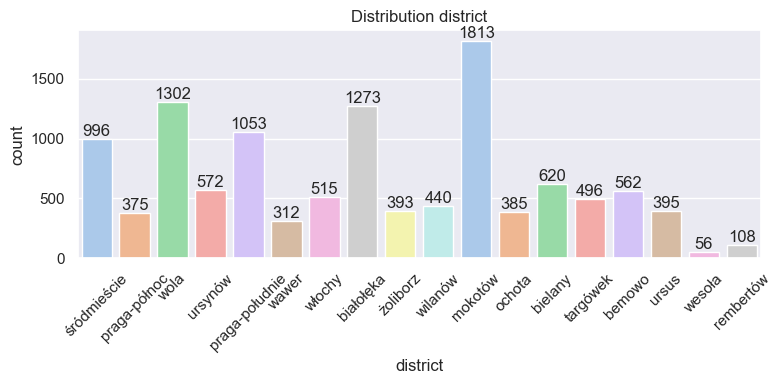

In [52]:
categorical_distr(df, "district")

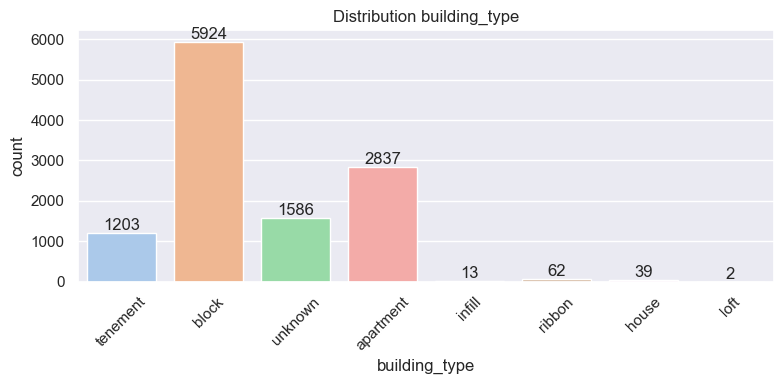

In [53]:
categorical_distr(df, "building_type")

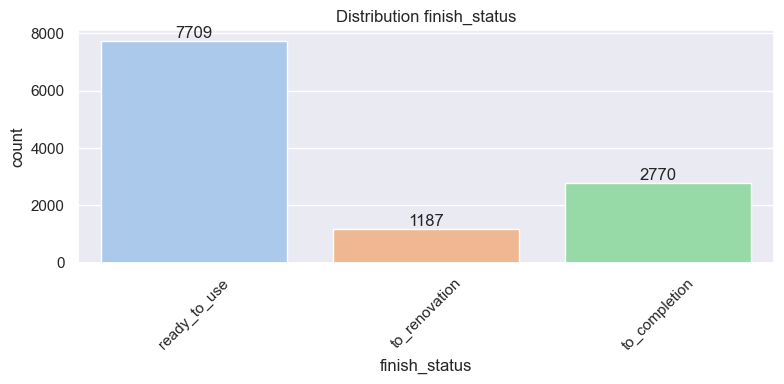

In [54]:
categorical_distr(df, "finish_status")

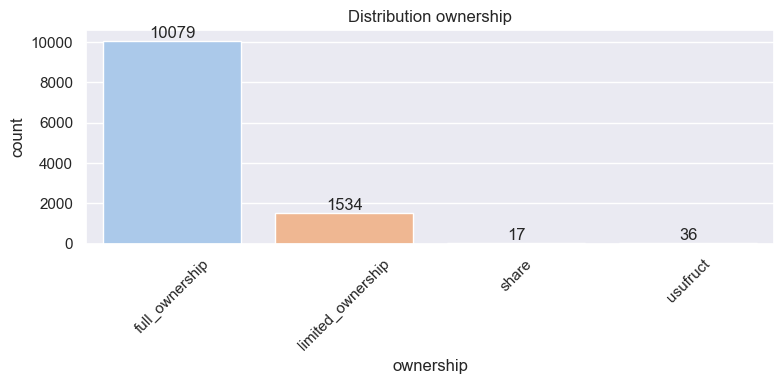

In [55]:
categorical_distr(df, "ownership")

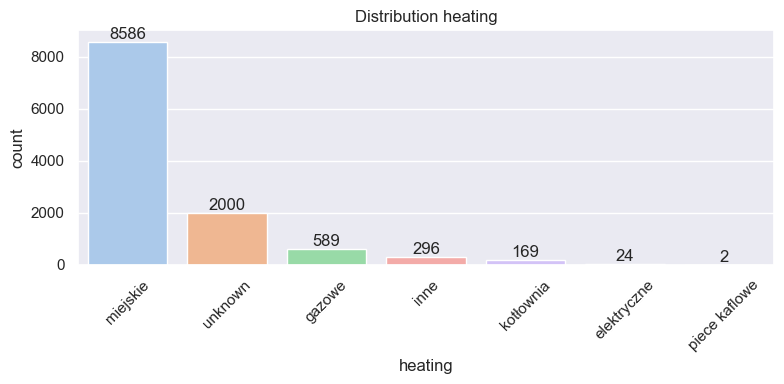

In [56]:
categorical_distr(df, "heating")

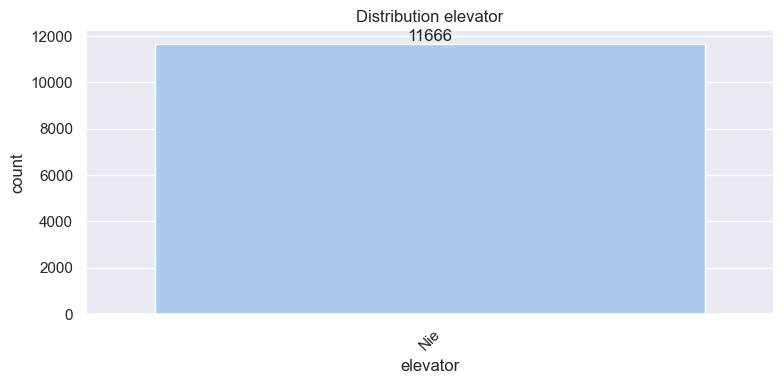

In [57]:
categorical_distr(df, "elevator")

2025-04-20 15:40:56,661 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-20 15:40:56,669 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


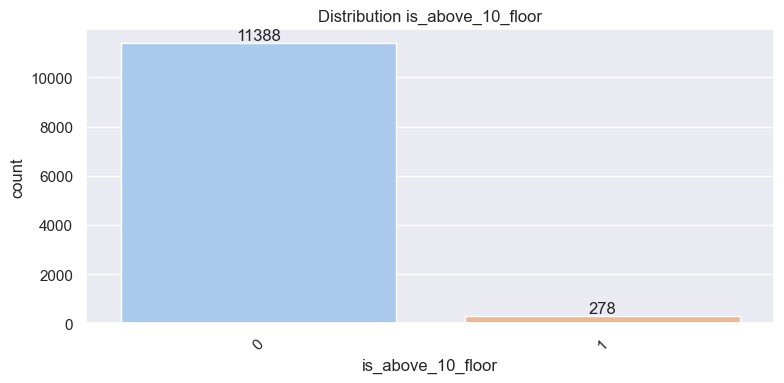

In [58]:
categorical_distr(df, "is_above_10_floor")

2025-04-20 15:40:56,789 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-20 15:40:56,798 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


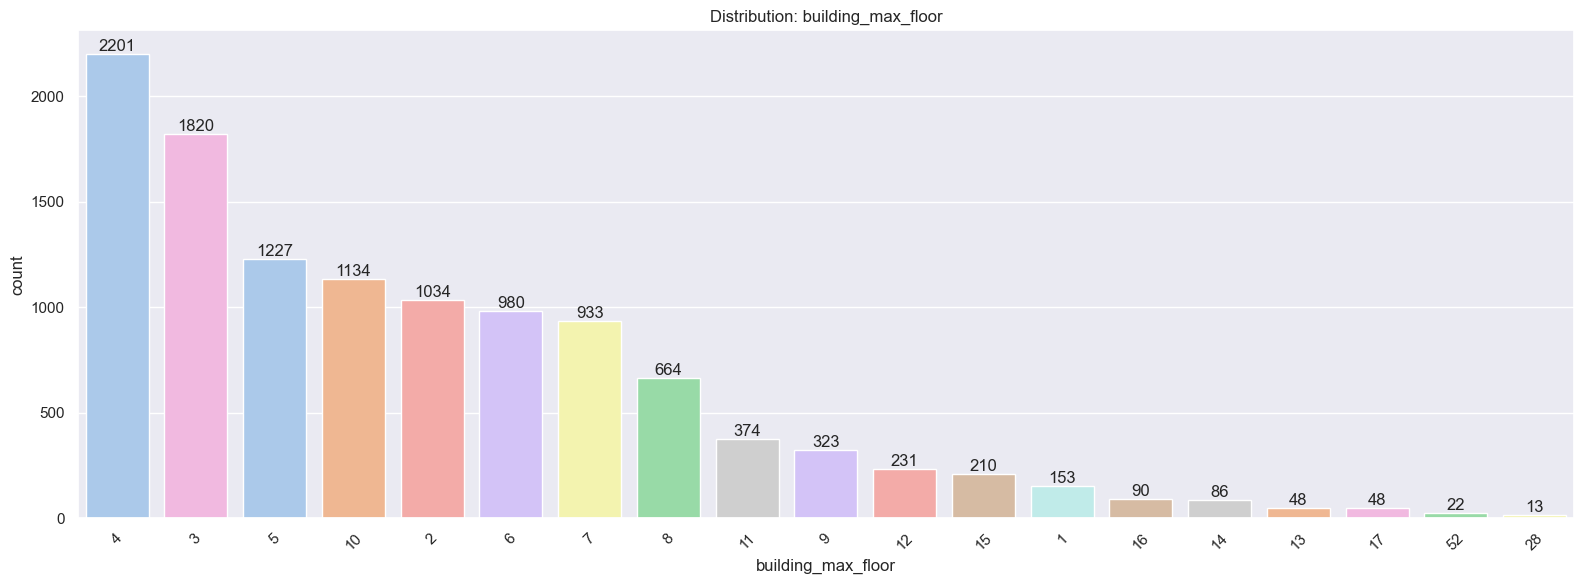

In [59]:
df['building_max_floor'] = df['building_max_floor'].apply(lambda x: str(int(x)) if pd.notnull(x) and float(x).is_integer() else str(x))
    
# Filtr – tylko najczęstsze wartości
value_counts = df['building_max_floor'].value_counts()
top_values = value_counts[value_counts > 10].index
filtered_df = df[df['building_max_floor'].isin(top_values)]
    
plt.figure(figsize=(16, 6))
order = filtered_df['building_max_floor'].value_counts().index
ax = sns.countplot(data=filtered_df, x='building_max_floor', hue='building_max_floor', order=order, palette="pastel", legend=False)
    
plt.xticks(rotation=45)
plt.title(f"Distribution: building_max_floor")

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

df['building_max_floor'] = pd.to_numeric(df['building_max_floor'], errors='coerce')

**Observation:** The categorical feature furnished contains only a single value, offering no variance for model learning. The market_type feature is heavily imbalanced, with most listings labeled as “wtórny.” Additionally, features like rooms and floor, although numeric, exhibit categorical-like behavior with dominant low values (e.g., 2–3 rooms, floors 1–3). The district column is also highly imbalanced, with a majority of listings from specific locations such as Mokotów.

**Interpretation:** The dataset exhibits a high degree of categorical imbalance, which can bias the model toward overrepresented groups. Features with no variability (e.g., furnished) should be removed, and techniques like grouping rare categories, frequency encoding, or target encoding should be considered to manage skewed distributions and reduce dimensionality during preprocessing.

## scatterplot for numerical dependencies

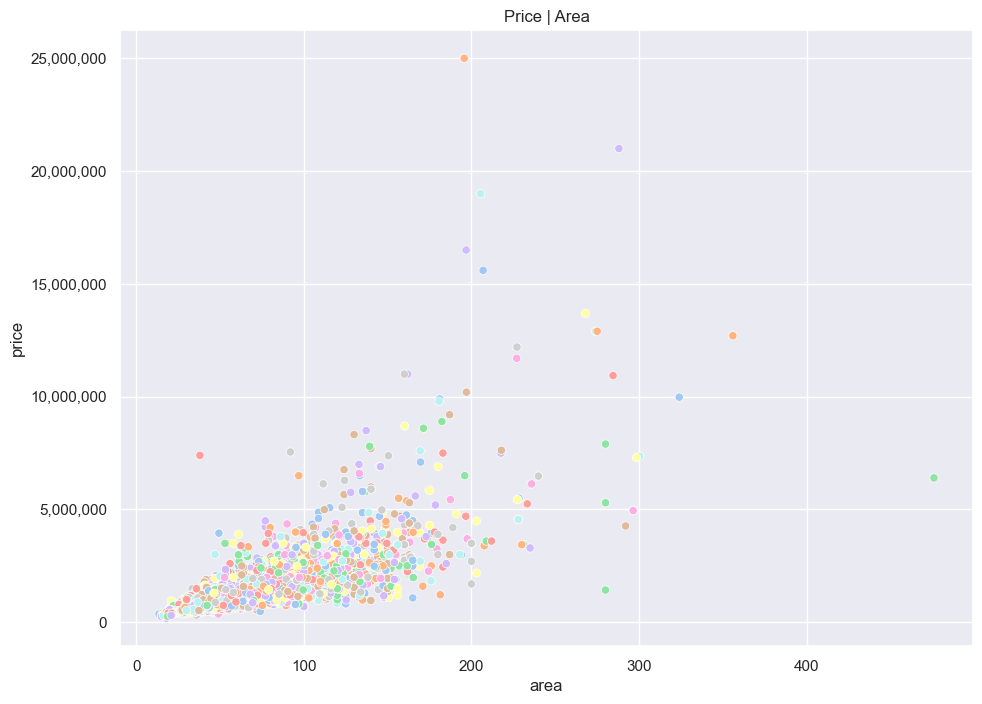

In [60]:
sns.scatterplot(data=df, x='area', hue='area', y='price', palette="pastel", legend=False)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price | Area")
plt.show()

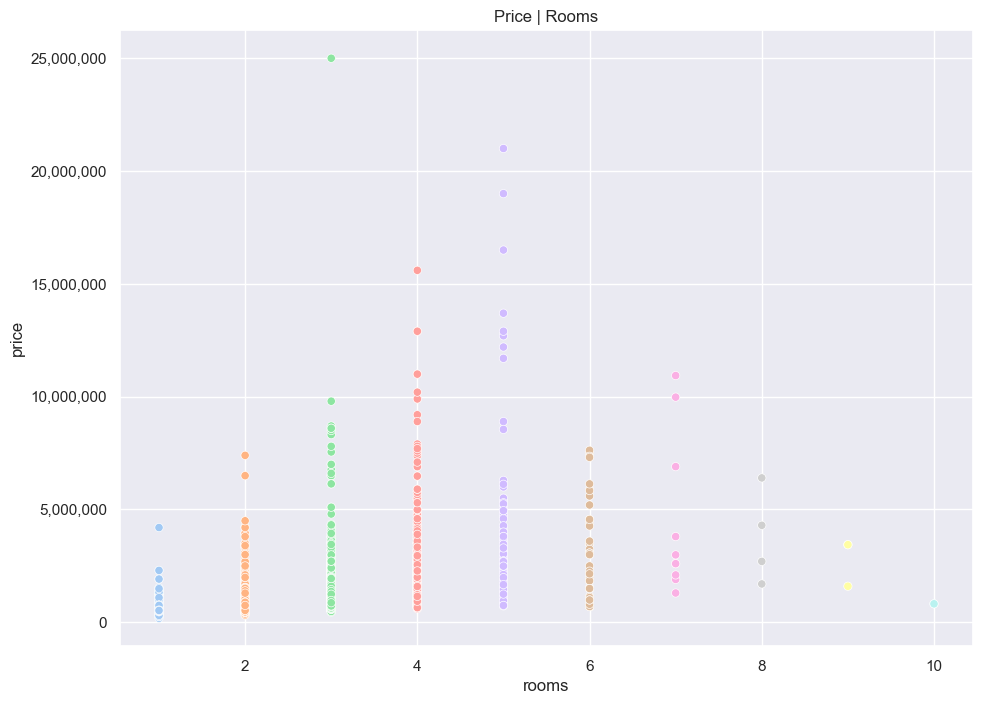

In [61]:
sns.scatterplot(data=df, x='rooms', hue='rooms', y='price', palette="pastel", legend=False)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price | Rooms")
plt.show()

**Observation:** The majority of listings fall within the range of 0–200 m² and up to 5,000,000 PLN. A strong positive trend between area and price is visible, though several extreme outliers exist above 10M PLN.
In the case of rooms, most expensive listings are associated with 5 or more rooms, yet the price variation is high even within lower room counts

**Interpretation:** There is a clear positive relationship between area and total price, supporting the intuition that larger properties cost more.
However, the price range within each room count is wide, suggesting that room number alone is not a sufficient predictor of price.

## price distribution by category

2025-04-20 15:40:57,673 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-20 15:40:57,687 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


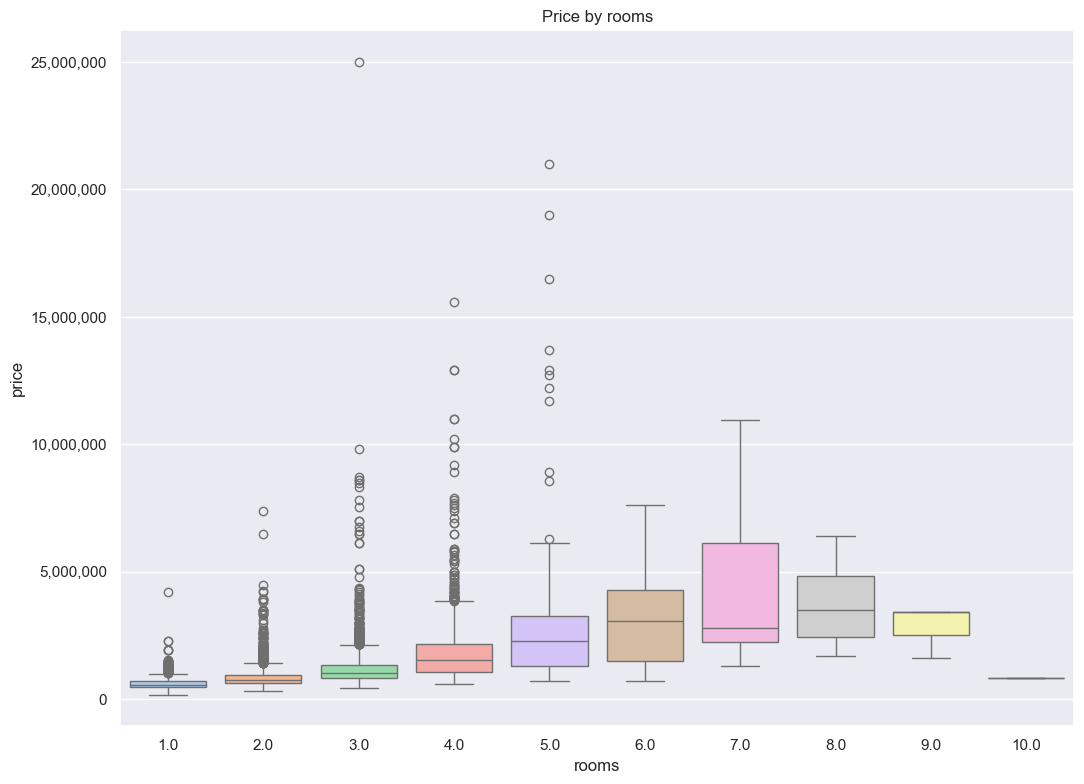

In [62]:
sns.boxplot(data=df, x='rooms', hue='rooms', y='price', palette='pastel', legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price by rooms")
plt.tight_layout()
plt.show()

2025-04-20 15:40:57,885 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-20 15:40:57,896 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


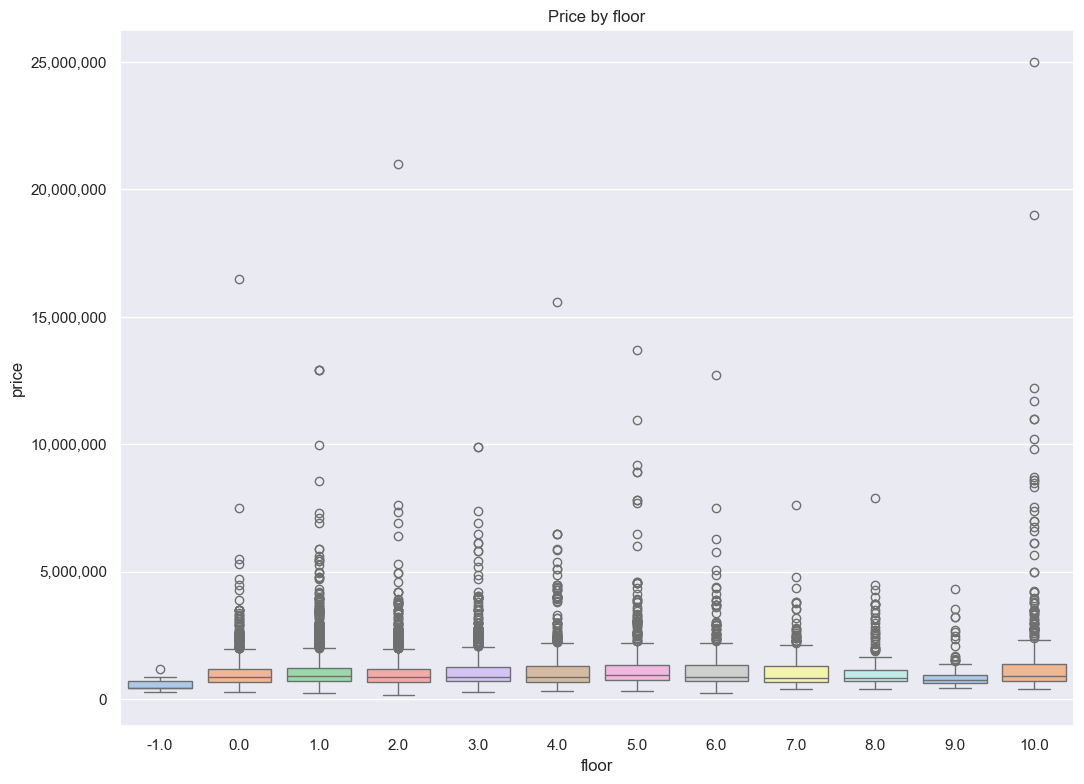

In [63]:
sns.boxplot(data=df, x='floor', hue='floor', y='price', palette='pastel', legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price by floor")
plt.tight_layout()
plt.show()

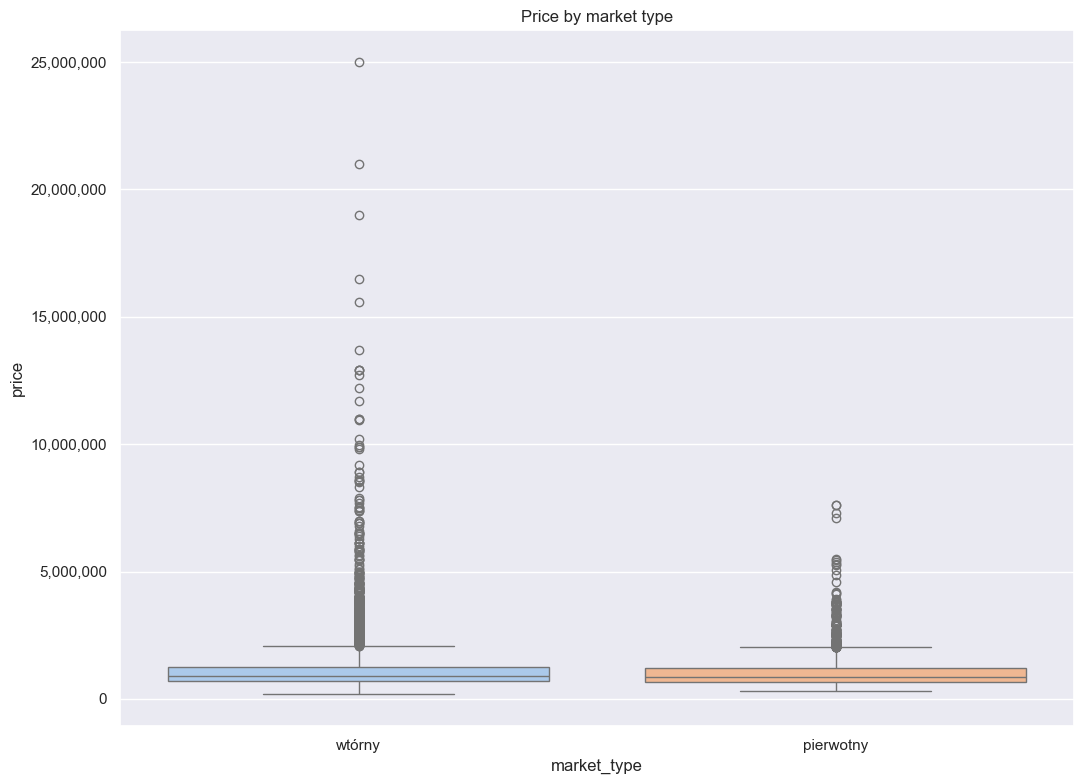

In [64]:
sns.boxplot(data=df, x='market_type', hue='market_type', y='price', palette='pastel')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price by market type")
plt.tight_layout()
plt.show()

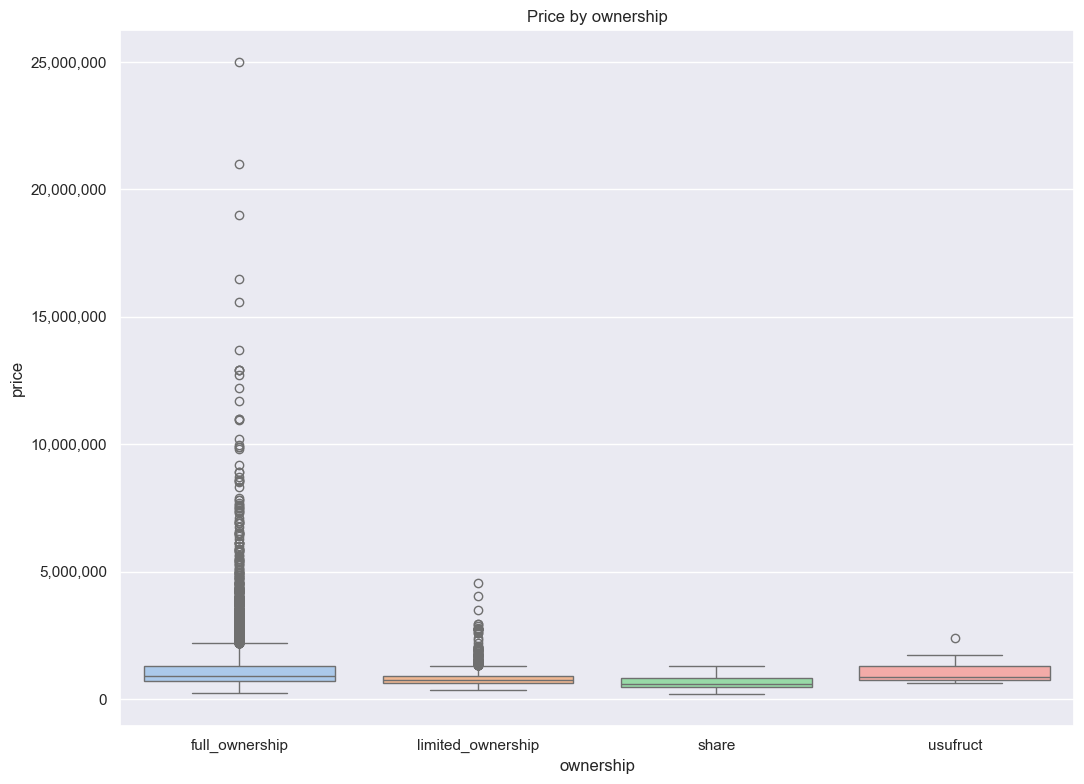

In [65]:
sns.boxplot(data=df, x='ownership', hue='ownership', y='price', palette='pastel')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price by ownership")
plt.tight_layout()
plt.show()

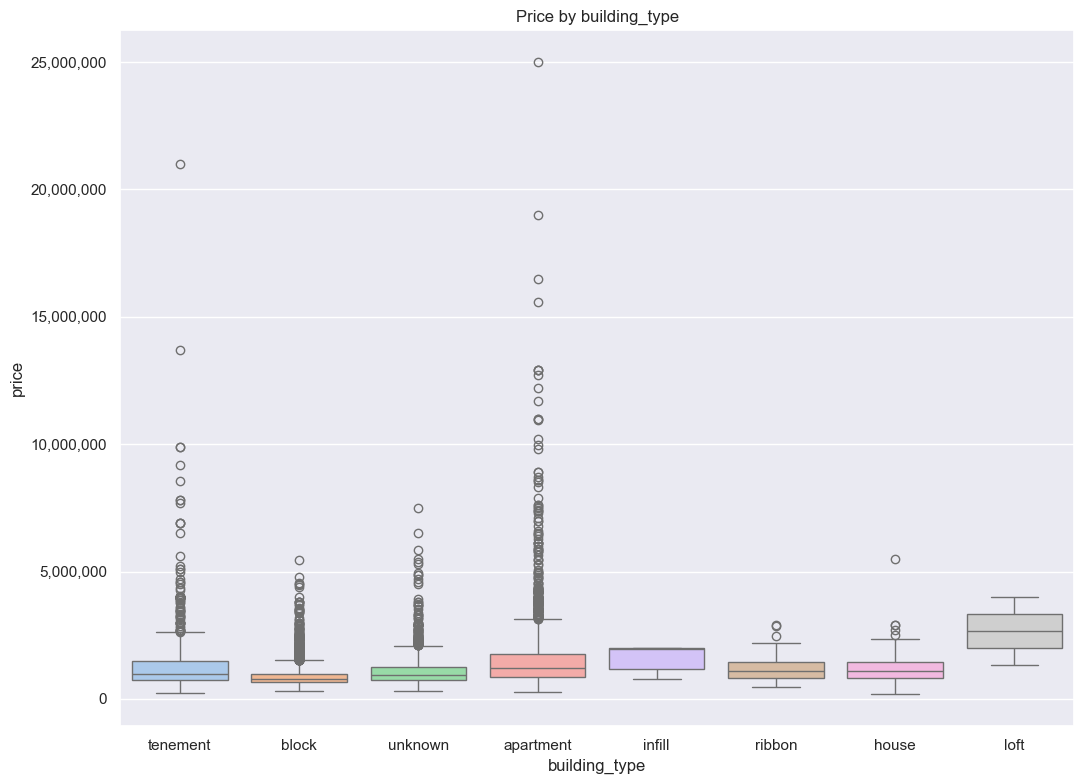

In [66]:
sns.boxplot(data=df, x='building_type', hue='building_type', y='price', palette='pastel', legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price by building_type")
plt.tight_layout()
plt.show()

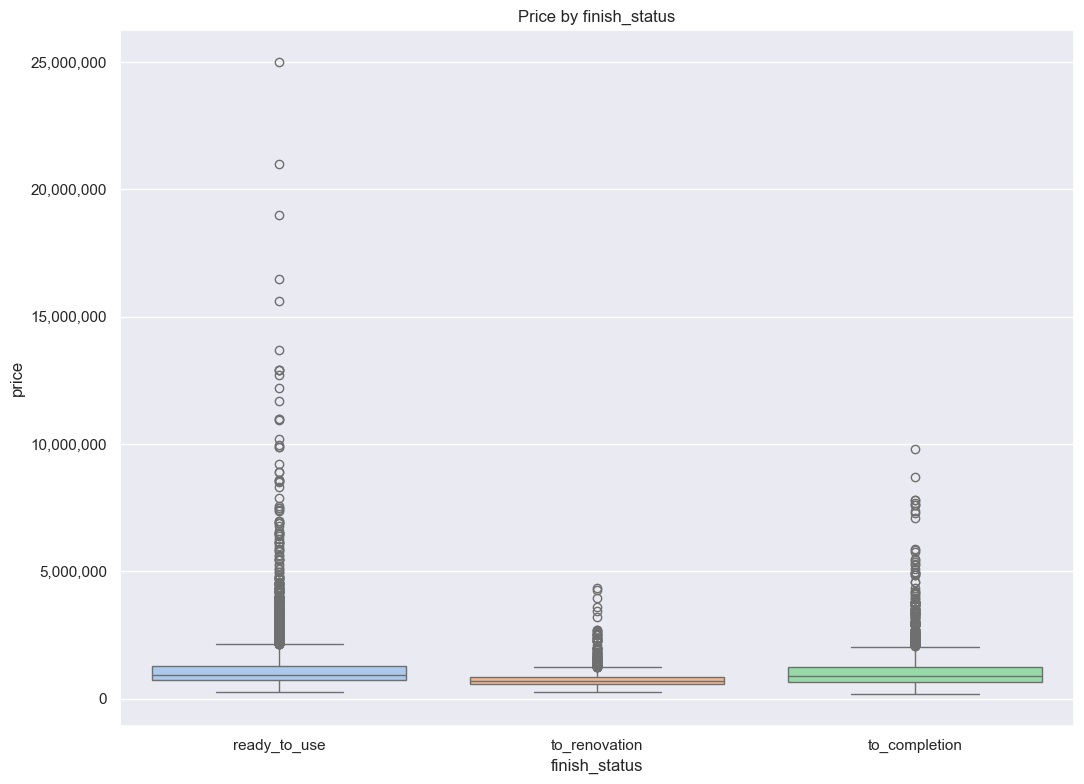

In [67]:
sns.boxplot(data=df, x='finish_status', hue='finish_status', y='price', palette='pastel', legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Price by finish_status")
plt.tight_layout()
plt.show()

**Observation:** Prices vary notably by categorical features. More rooms often mean higher prices. Loft buildings and full ownership have the highest medians. The secondary market shows more price variability. Outliers are common across all categories.

**Interpretation:** Features like rooms, ownership, and building_type are strong predictors of price. Category imbalance and outliers should be handled during preprocessing.

## price distribution by district

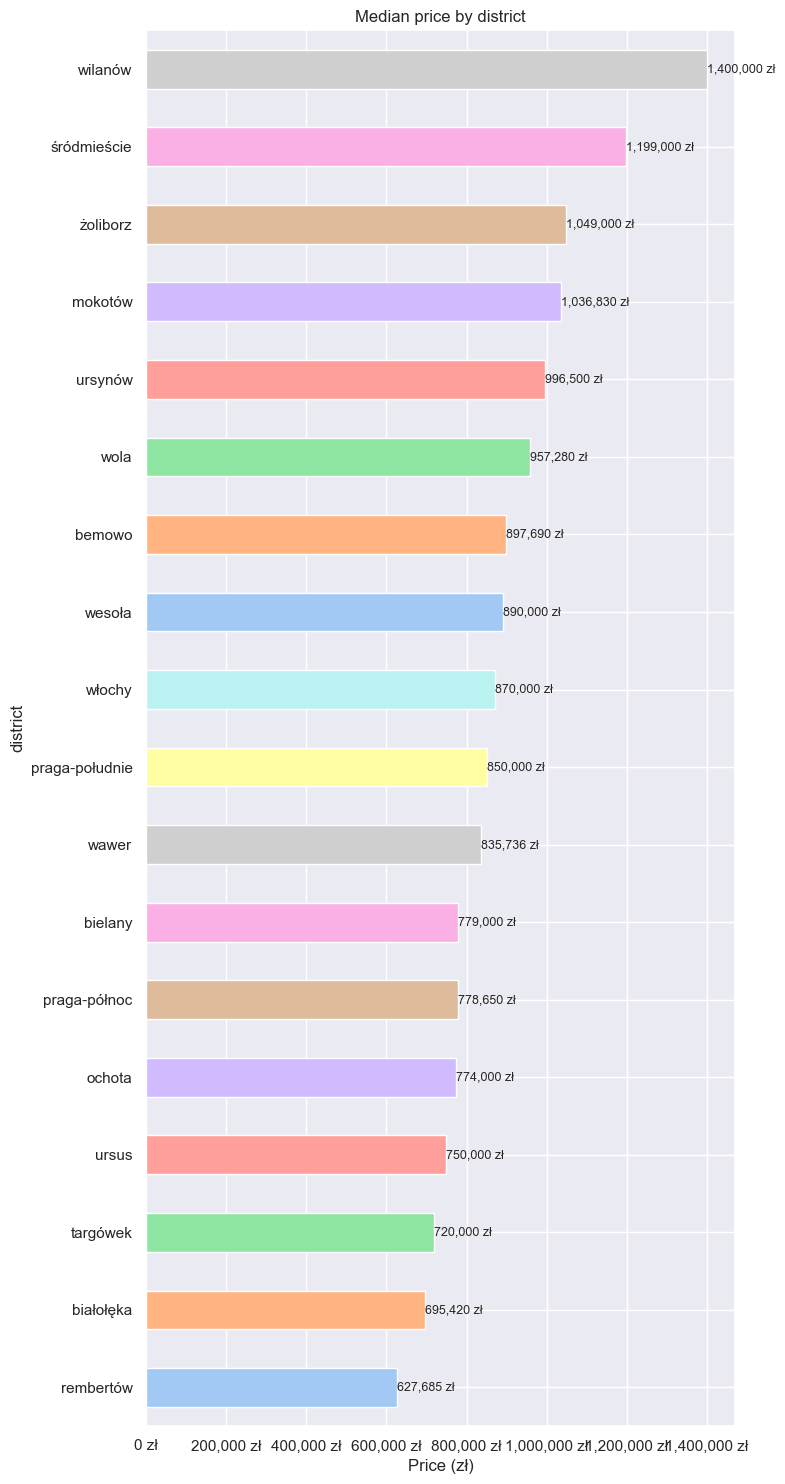

In [68]:
district_avg = df.groupby('district')['price'].median().sort_values()

colors = sns.color_palette("pastel", n_colors=len(district_avg))

ax = district_avg.plot(kind='barh',
                       figsize=(8, 15),
                       color=colors,
                       title='Median price by district')

for i, v in enumerate(district_avg):
    ax.text(v, i, f'{v:,.0f} zł', va='center', ha='left', fontsize=9)
    
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f} zł'))
plt.xlabel("Price (zł)")
plt.tight_layout()
plt.show()

**Observation:** Median prices differ strongly by district. The most expensive areas are Wilanów, Śródmieście, and Żoliborz, while Rembertów, Białołęka, and Białyka are the cheapest.

**Interpretation:** District has a major impact on pricing. It should be carefully encoded for modeling (e.g., using median price or target encoding).

*Jakub Sztyber 2025*